# NLTK SPAM CLASSIFIER

In [1]:
# Importing Required Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import nltk

In [2]:
## Importing Dataset from CSV file
dataset = pd.read_csv('SMSSpamCollection.csv',sep='\t')
dataset

,type,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [3]:
## Independent Variable
X = dataset['message'].values
print("Example :",X[0])
X.shape

Example : Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


(5572,)

In [4]:
## Dependent Variable
y = pd.get_dummies(dataset['type'])
y = y['spam'].values
y

array([0, 0, 1, ..., 0, 0, 0], dtype=uint8)

In [5]:
# Independent Variable
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

lemmatizer = WordNetLemmatizer()

corpus = []

for i in range(0,len(X)):
    sentence = re.sub('[^a-zA-z]',' ',X[i].lower())
    words = nltk.word_tokenize(sentence)
    lemma = [lemmatizer.lemmatize(word) for word in words if word not in set(stopwords.words('english'))]
    lemma = ' '.join(words)
    corpus.append(lemma)
    
corpus

['go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat',
 'ok lar joking wif u oni',
 'free entry in a wkly comp to win fa cup final tkts st may text fa to to receive entry question std txt rate t c s apply over s',
 'u dun say so early hor u c already then say',
 'nah i don t think he goes to usf he lives around here though',
 'freemsg hey there darling it s been week s now and no word back i d like some fun you up for it still tb ok xxx std chgs to send to rcv',
 'even my brother is not like to speak with me they treat me like aids patent',
 'as per your request melle melle oru minnaminunginte nurungu vettam has been set as your callertune for all callers press to copy your friends callertune',
 'winner as a valued network customer you have been selected to receivea prize reward to claim call claim code kl valid hours only',
 'had your mobile months or more u r entitled to update to the latest colour mobiles with camera for free call 

In [6]:
## TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

In [20]:
tfidf_cv = TfidfVectorizer(max_features=5000)
tfidf_cv.fit(corpus)
X_tfidf = tfidf_cv.transform(corpus).toarray()

In [21]:
print(X_tfidf.shape)

(5572, 5000)


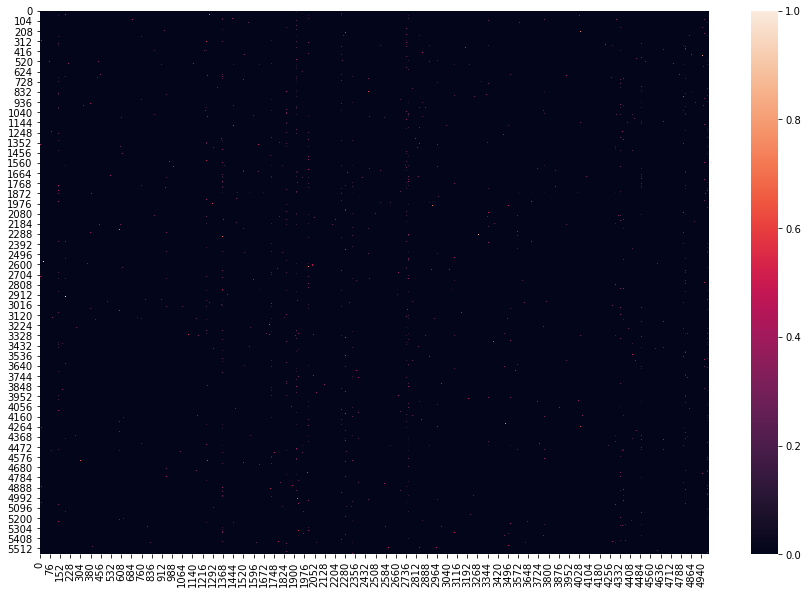

In [9]:
## TF-IDF Heatmap
plt.figure(figsize=(15,10))
sns.heatmap(X_tfidf)
plt.show()

In [10]:
# Splitting Train and Test Data
from sklearn.model_selection import train_test_split as tts

X_train, X_test, y_train, y_test = tts(X_tfidf,y,test_size=0.5)

In [11]:
X_train.shape

(2786, 5000)

In [12]:
X_test.shape

(2786, 5000)

In [13]:
y_train.shape

(2786,)

In [14]:
y_test.shape

(2786,)

In [15]:
from sklearn.naive_bayes import MultinomialNB

spam_detect_model = MultinomialNB()
spam_detect_model.fit(X_train,y_train)

MultinomialNB()

In [16]:
print("Model Score :",spam_detect_model.score(X_test,y_test))

Model Score : 0.949748743718593


In [17]:
y_predicted = spam_detect_model.predict(X_test)

In [18]:
results = pd.DataFrame()
results['Type'] = y_test
results['Predicted Type'] = y_predicted
results['Type'].value_counts()

0    2400
1     386
Name: Type, dtype: int64

In [19]:
results['Predicted Type'].value_counts()

0    2540
1     246
Name: Predicted Type, dtype: int64

In [22]:
# Exporting Count Vectorizer
import joblib
joblib.dump(tfidf_cv,'count-vectorizer')

['count-vectorizer']

In [23]:
# Exporting Model
joblib.dump(spam_detect_model,'spam-classifier-model')

['spam-classifier-model']